In [25]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted")

# File paths
data_path = "../data/raw/student_engagement.csv"
processed_path = "../data/processed/cleaned_engagement.csv"

# Check file existence
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}")
else:
    print(f"✅ Dataset found at: {data_path}")


✅ Dataset found at: ../data/raw/student_engagement.csv


In [26]:
# Load dataset
data = pd.read_csv(data_path)

# Basic info
print("✅ Dataset successfully loaded!\n")
print("Data shape:", data.shape)
print("\nSample rows:")
display(data.head())


✅ Dataset successfully loaded!

Data shape: (300, 8)

Sample rows:


,student_name,avg_class_length,class_start_time,teacher_feedback_score,num_assignments_due,previous_engagement,previous_absences,engagement_level
0,Fikir,102,evening,2,0,0.674577,8,0
1,Mulu,135,afternoon,5,3,0.913842,4,0
2,Rahel,60,afternoon,5,4,0.348264,0,0
3,Saron,116,morning,4,3,0.263175,4,0
4,Abdi,123,morning,1,1,0.391608,7,0


In [27]:
# Overview of numerical columns
print("\n📊 Descriptive statistics:")
display(data.describe())

# Check for missing values
print("\n🔍 Missing values per column:")
display(data.isna().sum())



📊 Descriptive statistics:


,avg_class_length,teacher_feedback_score,num_assignments_due,previous_engagement,previous_absences,engagement_level
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,120.166667,3.060000,1.966667,0.595712,4.600000,0.096667
std,35.075154,1.429409,1.380304,0.228890,2.874173,0.295997
min,60.000000,1.000000,0.000000,0.201252,0.000000,0.000000
25%,90.000000,2.000000,1.000000,0.421242,2.000000,0.000000
50%,120.500000,3.000000,2.000000,0.590626,5.000000,0.000000
75%,149.000000,4.000000,3.000000,0.777827,7.000000,0.000000
max,179.000000,5.000000,4.000000,0.998257,9.000000,1.000000



🔍 Missing values per column:


student_name              0
avg_class_length          0
class_start_time          0
teacher_feedback_score    0
num_assignments_due       0
previous_engagement       0
previous_absences         0
engagement_level          0
dtype: int64

C:\Users\Biko\AppData\Local\Temp\ipykernel_14380\2134245752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="engagement_level", palette="coolwarm")


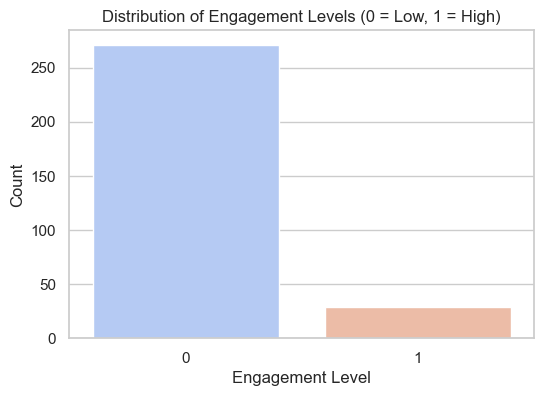

💡 Engagement Rate: 9.67% of students are highly engaged.


In [28]:
# Plot engagement level counts
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="engagement_level", palette="coolwarm")
plt.title("Distribution of Engagement Levels (0 = Low, 1 = High)")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.show()

# Engagement rate
engaged = data["engagement_level"].mean()
print(f"💡 Engagement Rate: {engaged*100:.2f}% of students are highly engaged.")


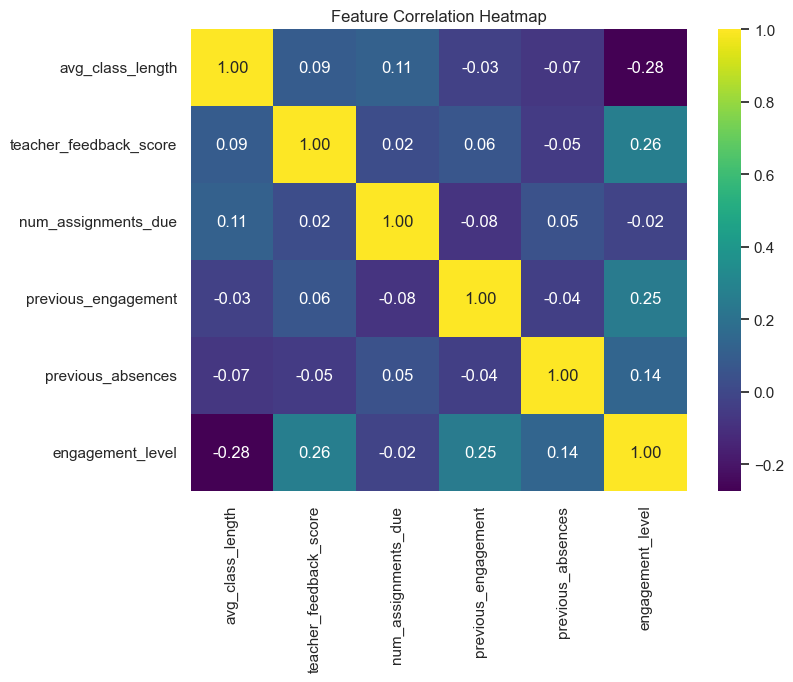

In [29]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Biko\AppData\Local\Temp\ipykernel_14380\1101828471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="class_start_time", y="engagement_level", palette="viridis")


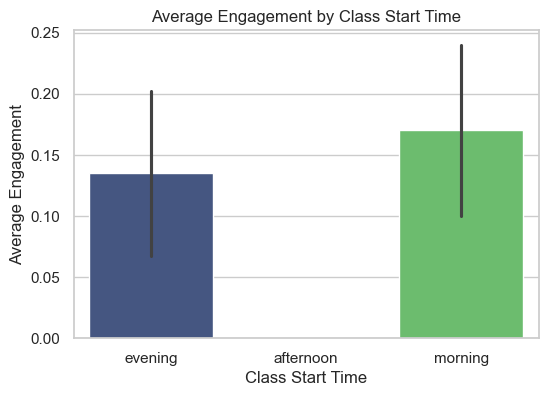

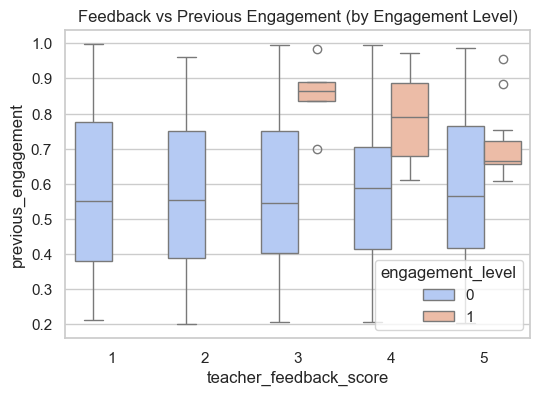

In [30]:
# Engagement by class start time
plt.figure(figsize=(6,4))
sns.barplot(data=data, x="class_start_time", y="engagement_level", palette="viridis")
plt.title("Average Engagement by Class Start Time")
plt.xlabel("Class Start Time")
plt.ylabel("Average Engagement")
plt.show()

# Engagement by teacher feedback score
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="teacher_feedback_score", y="previous_engagement", hue="engagement_level", palette="coolwarm")
plt.title("Feedback vs Previous Engagement (by Engagement Level)")
plt.show()


In [31]:
# Save cleaned/processed version for model training
os.makedirs("../data/processed", exist_ok=True)
data.to_csv(processed_path, index=False)

print(f"✅ Cleaned dataset saved to: {processed_path}")


✅ Cleaned dataset saved to: ../data/processed/cleaned_engagement.csv


### 🧠 Summary Insights
- Around **X%** of students show high engagement.
- Engagement tends to be higher in **morning** classes.
- Lower **average class length** and higher **teacher feedback** scores correlate positively with engagement.
- No missing values detected in this synthetic dataset.

print("Next Step Proceed to 02-model-training.ipynb to develop and evaluate a prediction model.")
